In [36]:
import numpy as np
import tensorflow as tf

from mrtoct import data

from matplotlib import pyplot as plt

transform = data.transform.DecodeExample()

def read_volume(path):
    return (tf.data.TFRecordDataset(path, 'GZIP')
            .map(transform)
            .make_one_shot_iterator()
            .get_next())

def mae(x, y):
    return np.abs(x - y).mean()

def psnr(x, y):
    max = np.iinfo(np.uint16).max
    mse = np.square(x - y).mean()
    
    return 20 * np.log10(max / np.sqrt(mse))

In [37]:
training = {
    'inputs': read_volume('../data/tfrecord/training/mr.tfrecord'),
    'targets': read_volume('../data/tfrecord/cleaned/ct.tfrecord'),
    'unet': read_volume('results/unet/mae2/training22080.tfrecord'),
    'pixtopix': read_volume('results/pixtopix/lsquare-clean/training.tfrecord'),
}

validation = {
    'inputs': read_volume('../data/tfrecord/validation/mr.tfrecord'),
    'targets': read_volume('../data/tfrecord/cleaned/validation-ct.tfrecord'),
    'unet': read_volume('results/unet/mae2/validation22080.tfrecord'),
    'pixtopix': read_volume('results/pixtopix/lsquare-clean/validation.tfrecord'),
}

session = tf.Session()

In [29]:
mr_t, ct_t, unet_t, pixtopix_t = session.run(list(training.values()))
mr_v, ct_v, unet_v, pixtopix_v = session.run(list(validation.values()))

In [30]:
def unpad(x, shape):
    height = np.abs(shape[1] - x.shape[1]) / 2
    width = np.abs(shape[2] - x.shape[2]) / 2
    
    start_h = int(np.floor(height))
    start_w = int(np.floor(width))

    end_h = - int(np.ceil(height))
    end_w = - int(np.ceil(width))
    
    return x[:, start_h:end_h, start_w:end_w]

In [31]:
unet_tr = unpad(unet_t, ct_t.shape)
pixtopix_tr = unpad(pixtopix_t, ct_t.shape)

unet_vr = unpad(unet_v, ct_v.shape)
pixtopix_vr = unpad(pixtopix_v, ct_v.shape)

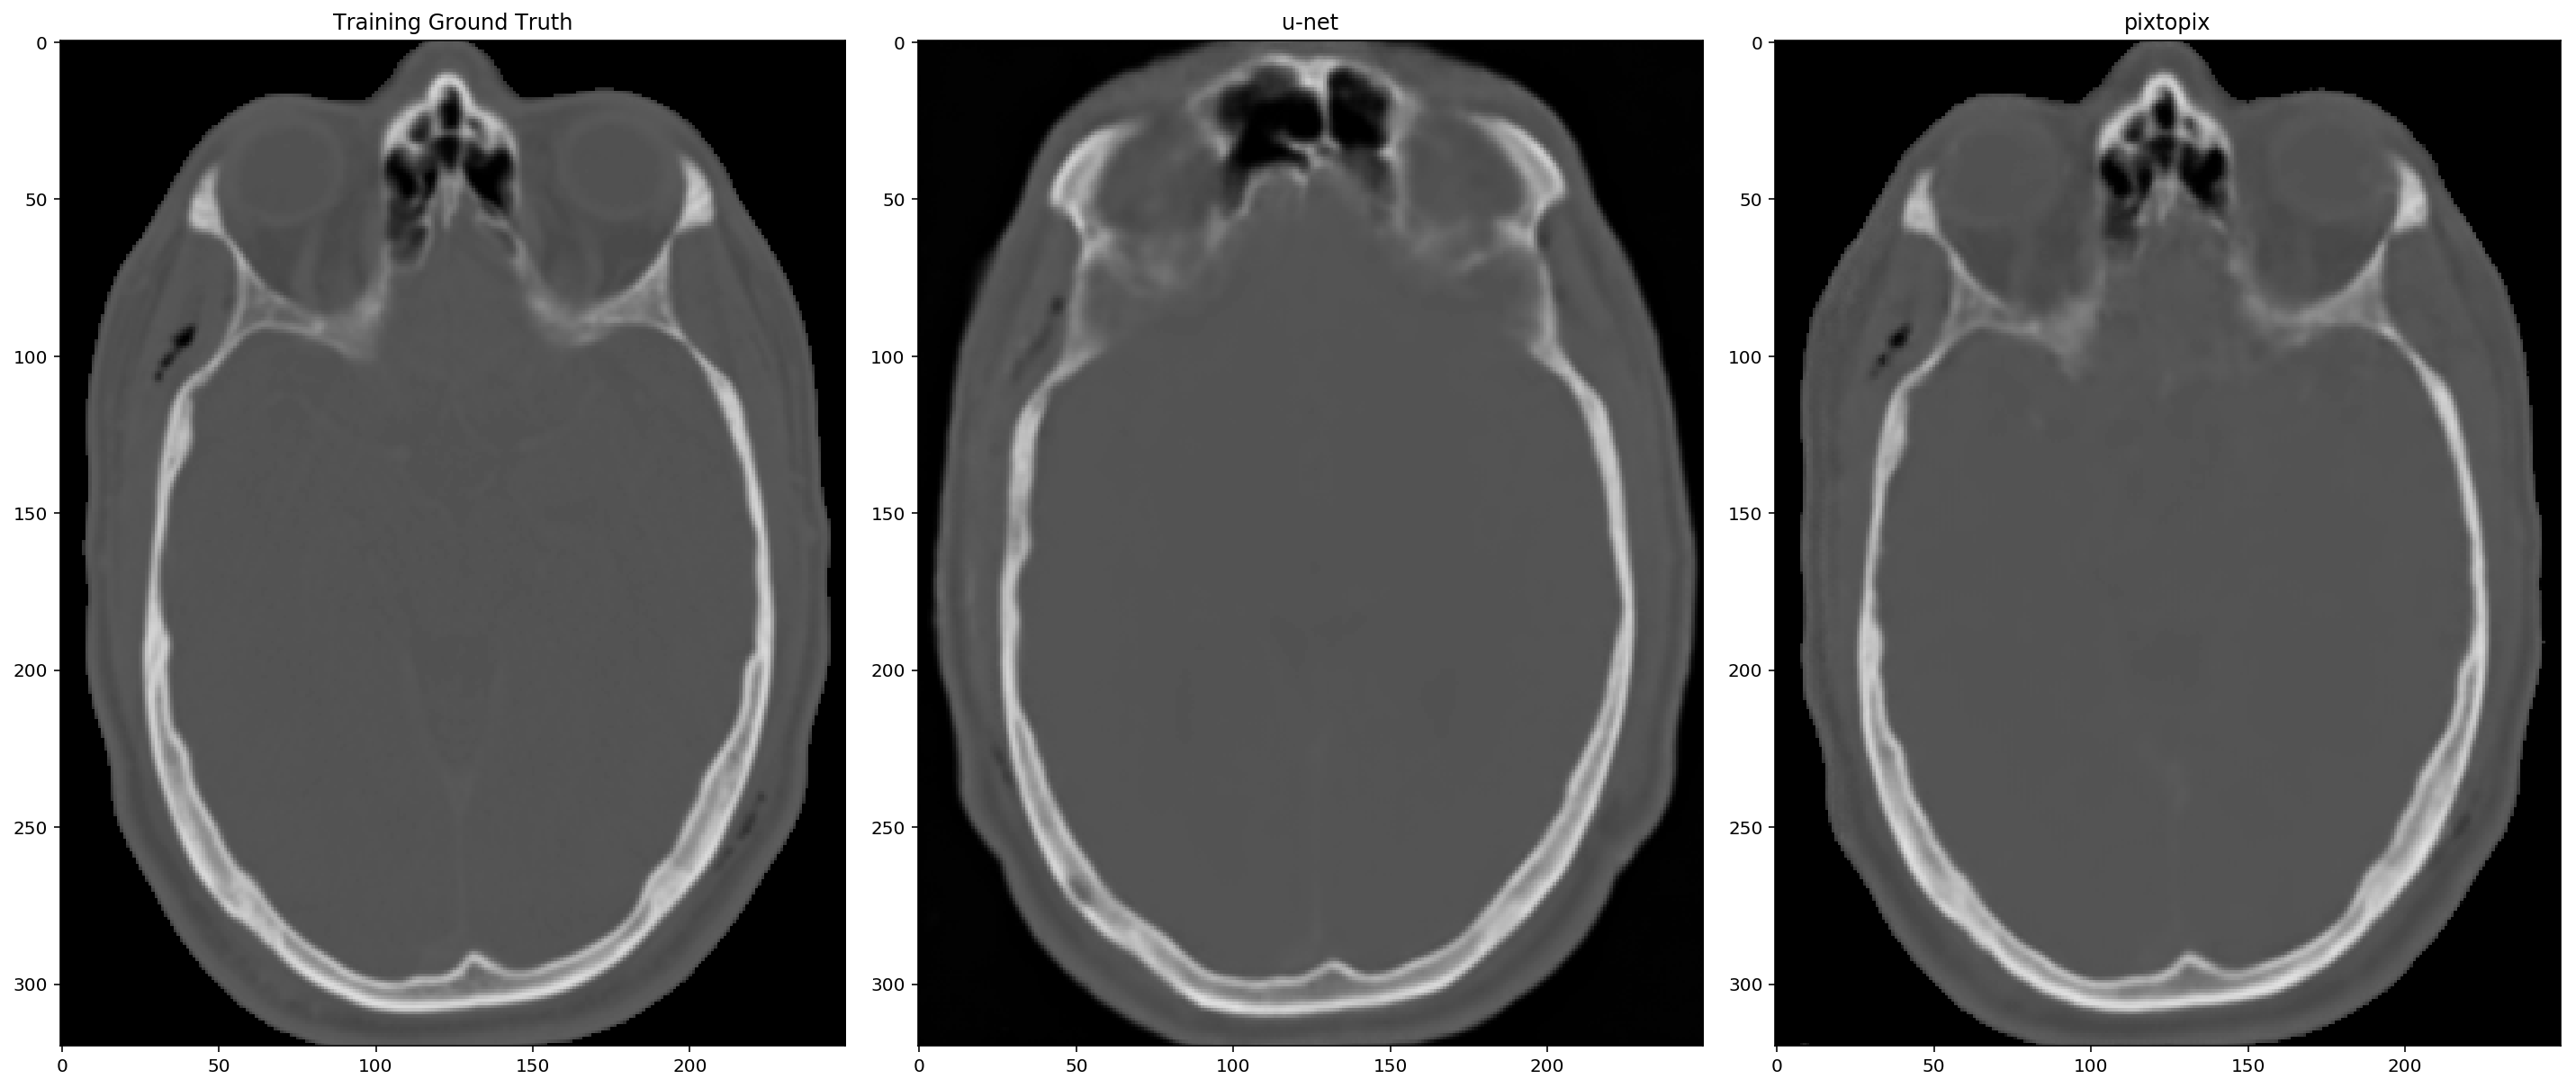

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(20, 20))

vmin = ct_t.min()
vmax = ct_t.max()

axes[0].set_title('Training Ground Truth')
axes[0].imshow(ct_t[100, :, :, 0], cmap='gray', vmin=vmin, vmax=vmax)

axes[1].set_title('u-net')
axes[1].imshow(unet_tr[100, :, :,0], cmap='gray', vmin=vmin, vmax=vmax)

axes[2].set_title('pixtopix')
axes[2].imshow(pixtopix_tr[100, :, :,0], cmap='gray', vmin=vmin, vmax=vmax)

fig.tight_layout()
plt.show()

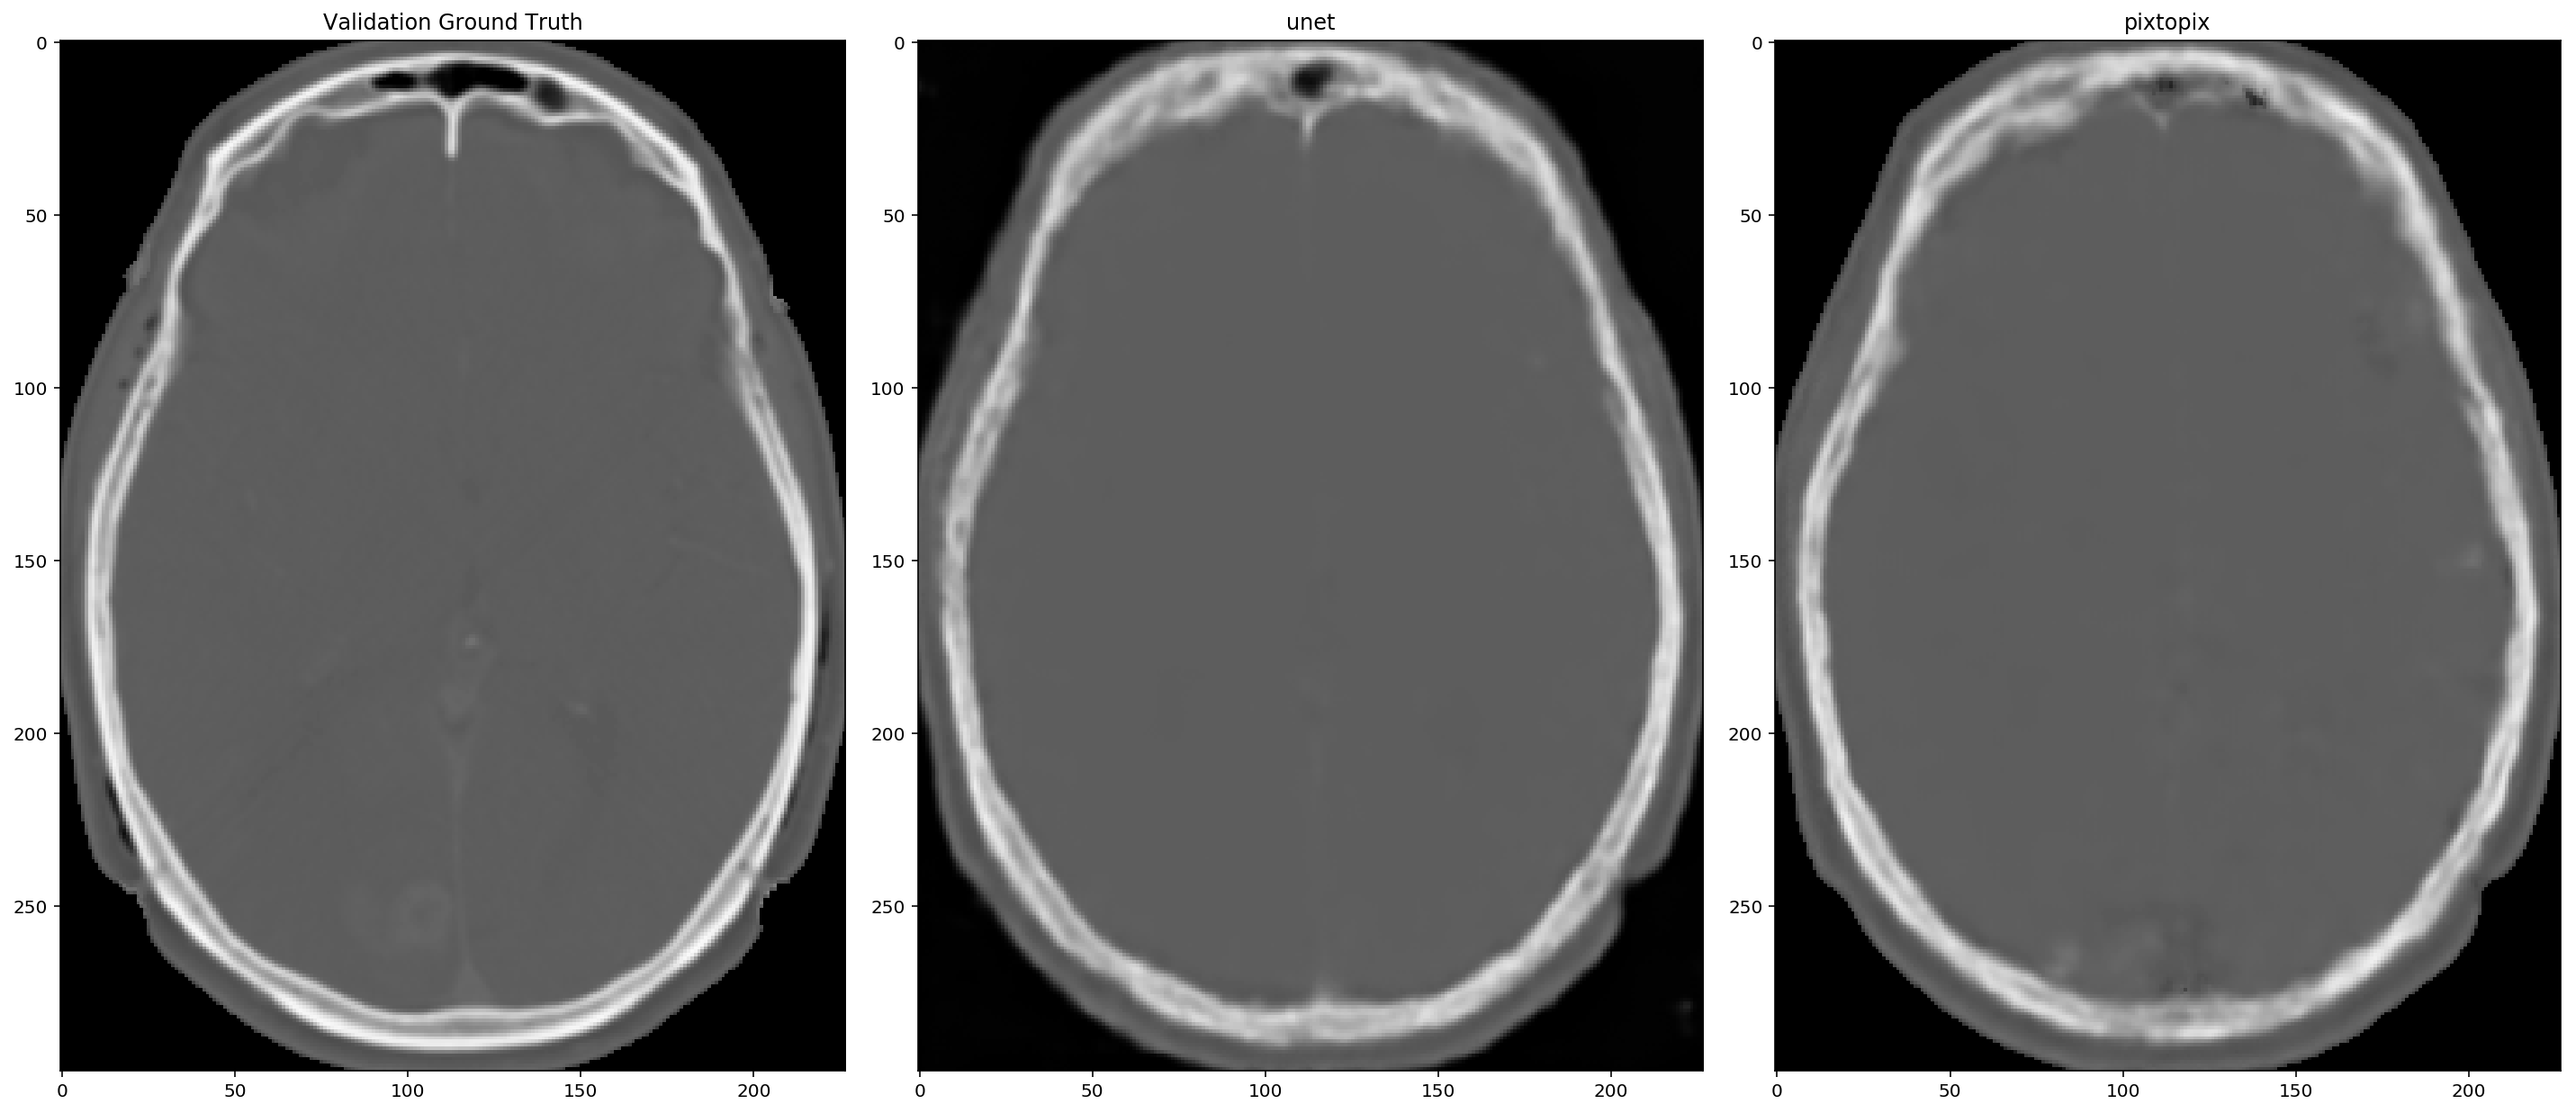

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(20, 20))

vmin = ct_v.min()
vmax = ct_v.max()

axes[0].set_title('Validation Ground Truth')
axes[0].imshow(ct_v[100, :, :, 0], cmap='gray', vmin=vmin, vmax=vmax)

axes[1].set_title('unet')
axes[1].imshow(unet_vr[100, :, :,0], cmap='gray', vmin=vmin, vmax=vmax)

axes[2].set_title('pixtopix')
axes[2].imshow(pixtopix_vr[100, :, :,0], cmap='gray', vmin=vmin, vmax=vmax)

fig.tight_layout()
plt.show()

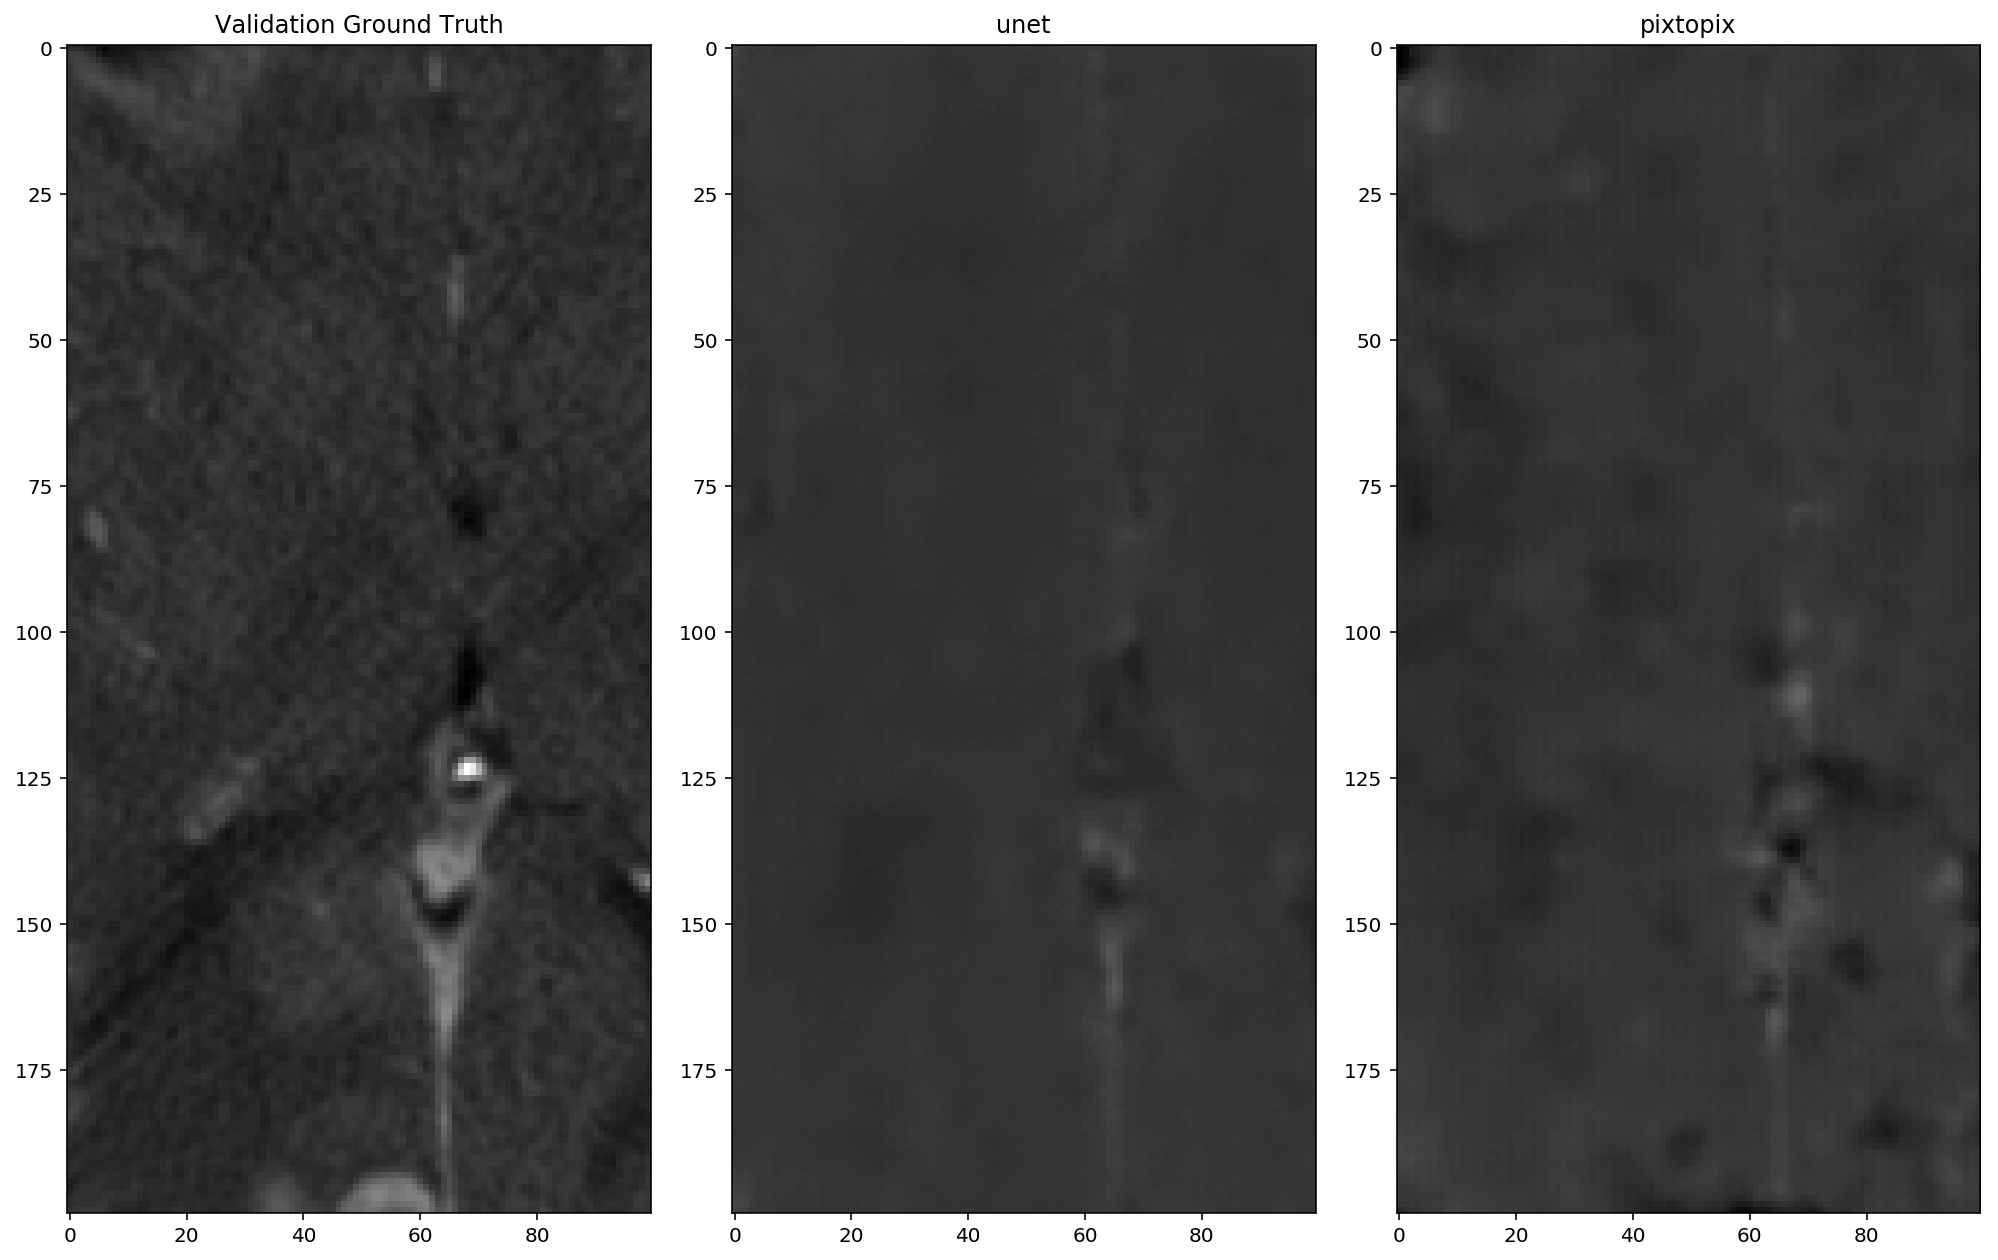

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(14, 20))

vmin = ct_v[100, 50:250, 50:150, 0].min()
vmax = ct_v[100, 50:250, 50:150, 0].max()

axes[0].set_title('Validation Ground Truth')
axes[0].imshow(ct_v[100, 50:250, 50:150, 0], cmap='gray', vmin=vmin, vmax=vmax)

axes[1].set_title('unet')
axes[1].imshow(unet_vr[100, 50:250, 50:150, 0], cmap='gray', vmin=vmin, vmax=vmax)

axes[2].set_title('pixtopix')
axes[2].imshow(pixtopix_vr[100, 50:250, 50:150, 0], cmap='gray', vmin=vmin, vmax=vmax)

fig.tight_layout()
plt.show()

In [38]:
unet_t_mae= []
unet_t_psnr = []

pixtopix_t_mae= []
pixtopix_t_psnr = []

def mae(x, y):
    return np.abs(x - y).mean()

try:
    while True:
        mr_t, ct_t, unet_t, pixtopix_t = session.run(list(training.values()))
    
        unet_tr = unpad(unet_t, ct_t.shape)
        pixtopix_tr = unpad(pixtopix_t, ct_t.shape)
    
        pixtopix_t_mae.append(mae(pixtopix_tr, ct_t))
        pixtopix_t_psnr.append(psnr(pixtopix_tr, ct_t))
except:
    pass

In [39]:
unet_v_mae= []
unet_v_psnr = []

pixtopix_v_mae= []
pixtopix_v_psnr = []

def mae(x, y):
    return np.abs(x - y).mean()

while True:
    mr_v, ct_v, unet_v, pixtopix_v = session.run(list(validation.values()))
    
    unet_vr = unpad(unet_v, ct_v.shape)
    pixtopix_vr = unpad(pixtopix_v, ct_v.shape)
    
    pixtopix_v_mae.append(mae(pixtopix_vr, ct_v))
    pixtopix_v_psnr.append(psnr(pixtopix_vr, ct_v))

OutOfRangeError: End of sequence
	 [[Node: IteratorGetNext_54 = IteratorGetNext[output_shapes=[<unknown>], output_types=[DT_INT32], _device="/job:localhost/replica:0/task:0/device:CPU:0"](OneShotIterator_54)]]

Caused by op 'IteratorGetNext_54', defined at:
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 281, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 232, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 397, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-f1278215a76c>", line 11, in <module>
    'unet': read_volume('results/unet/mae2/validation22080.tfrecord'),
  File "<ipython-input-36-630f3155f537>", line 12, in read_volume
    .map(transform)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tensorflow/python/data/ops/iterator_ops.py", line 259, in get_next
    name=name))
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tensorflow/python/ops/gen_dataset_ops.py", line 706, in iterator_get_next
    output_shapes=output_shapes, name=name)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/usr/local/Cellar/pyenv/1.2.0/versions/3.6.3/envs/mrtoct/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

OutOfRangeError (see above for traceback): End of sequence
	 [[Node: IteratorGetNext_54 = IteratorGetNext[output_shapes=[<unknown>], output_types=[DT_INT32], _device="/job:localhost/replica:0/task:0/device:CPU:0"](OneShotIterator_54)]]


In [40]:
for i, mae in enumerate(pixtopix_v_mae):
    print(f'pixtopix (MAE, Validation Patient {i})', mae)
print('pixtopix (MAE, Validation Mean)', np.mean(pixtopix_v_mae))
print('')

for i, psnr in enumerate(pixtopix_v_psnr):
    print(f'pixtopix (PSNR Validation Patient {i})', psnr)
print('pixtopix (PSNR, Validation Mean)', np.mean(pixtopix_v_psnr))

pixtopix (MAE, Validation Patient 0) 77.4300116996
pixtopix (MAE, Validation Patient 1) 105.078783777
pixtopix (MAE, Validation Patient 2) 144.761319908
pixtopix (MAE, Validation Patient 3) 123.637394912
pixtopix (MAE, Validation Mean) 112.726877574

pixtopix (PSNR Validation Patient 0) 50.4605312991
pixtopix (PSNR Validation Patient 1) 47.5065009476
pixtopix (PSNR Validation Patient 2) 45.3144451348
pixtopix (PSNR Validation Patient 3) 46.910566083
pixtopix (PSNR, Validation Mean) 47.5480108661


In [41]:


for i, mae in enumerate(pixtopix_t_mae):
    print(f'pixtopix (MAE, Training Patient {i})', mae)
print('pixtopix (MAE, Training Mean)', np.mean(pixtopix_t_mae))
print('')

for i, psnr in enumerate(pixtopix_t_psnr):
    print(f'pixtopix (PSNR Training Patient {i})', psnr)
print('pixtopix (PSNR, Training Mean)', np.mean(pixtopix_t_psnr))

pixtopix (MAE, Training Patient 0) 23.6492149635
pixtopix (MAE, Training Patient 1) 23.3186336773
pixtopix (MAE, Training Patient 2) 20.6995220442
pixtopix (MAE, Training Patient 3) 18.456841663
pixtopix (MAE, Training Patient 4) 14.8128780654
pixtopix (MAE, Training Patient 5) 16.0205601082
pixtopix (MAE, Training Patient 6) 16.4812015862
pixtopix (MAE, Training Patient 7) 21.0088881707
pixtopix (MAE, Training Patient 8) 32.3383380772
pixtopix (MAE, Training Patient 9) 23.9929544506
pixtopix (MAE, Training Patient 10) 26.5341938384
pixtopix (MAE, Training Patient 11) 23.6159898402
pixtopix (MAE, Training Patient 12) 19.3466426249
pixtopix (MAE, Training Mean) 21.55968147

pixtopix (PSNR Training Patient 0) 59.9544974203
pixtopix (PSNR Training Patient 1) 60.0312447823
pixtopix (PSNR Training Patient 2) 60.7438849893
pixtopix (PSNR Training Patient 3) 61.6871350956
pixtopix (PSNR Training Patient 4) 63.0398504679
pixtopix (PSNR Training Patient 5) 62.5230951753
pixtopix (PSNR Training 